In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import datetime as dt
import os
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from dtw import dtw
from sklearn.metrics import pairwise_distances
import pickle

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
import datetime as dt
import os
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from dtw import dtw
from sklearn.metrics import pairwise_distances
import pickle
PRE_NAME = "onemin_ohlc_"
BEGIN_TIME = "09:00:00"
END_TIME = "11:00:00"
NUM_CLUSTER = 50
def load_data(date_begin='20180612', date_end = '20180928', split_date_begin = '20181001', split_date_end = '20181031', train = True):
    X = []
    Y = []
    # df = pd.read_csv(os.path.join('dataset', '2327', PRE_NAME+"20180612.csv"))
    # mask = (df.loc[:, "time"] >= BEGIN_TIME) & (df.loc[:, "time"] <= END_TIME)
    # front_df = df[mask].loc[:, "return"]
    # end_df = df[~mask].loc[:, "return"]
    # X.append(np.array(front_df))
    # Y.append(np.array(end_df))
    # """我是分隔線^^~"""
    # df = pd.read_csv(os.path.join('dataset', '2327', PRE_NAME+"20180613.csv"))
    # mask = (df.loc[:, "time"] >= BEGIN_TIME) & (df.loc[:, "time"] <= END_TIME)
    # front_df = df[mask].loc[:, "return"]
    # end_df = df[~mask].loc[:, "return"]
    # X.append(np.array(front_df))
    # Y.append(np.array(end_df))
    
    for sid in tqdm(os.listdir(os.path.join('dataset'))):
        for file in os.listdir(os.path.join('dataset', sid)):
            curday = file[12:20]
            if (train == True and curday <= date_end and curday >= date_begin) or (train == False and curday >= split_date_begin and curday <= split_date_end):
                df = pd.read_csv(os.path.join('dataset', sid, file))
                df = df
                mask = (df.loc[:, "time"] >= BEGIN_TIME) & (df.loc[:, "time"] <= END_TIME)
                front_df = df[mask].loc[:, "return"]
                front_df = front_df.take(np.arange(0, len(front_df), 5))
                end_df = df[~mask].loc[:, "return"]
                if len(front_df) == (121 // 5 +1):
                    X.append(np.array(front_df))
                Y.append(np.array(end_df))
    return np.array(X), np.array(Y)

def dtw_d(X, Y):
    manhattan_distance = lambda x, y: np.abs(x - y)
    d, cost_matrix, acc_cost_matrix, path = dtw(X, Y, dist=manhattan_distance)
    return d

def dtw_affinity(X):
    return pairwise_distances(X, metric=dtw_d)

X, Y = load_data()


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:03<00:00,  3.77it/s]


In [21]:
X_test, Y_test = load_data(train=False)


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 14.19it/s]


In [22]:
print(X.shape)

(417, 25)


In [23]:
print(X_test.shape)

(163, 25)


In [ ]:
t1 = time.time()
ac = AgglomerativeClustering(n_clusters = NUM_CLUSTER,
                             affinity = dtw_affinity,
                             linkage = 'complete')
X_label = ac.fit_predict(X)
t2 = time.time()
print(t2-t1)

In [ ]:
X_label

In [ ]:
for n in range(NUM_CLUSTER):
    for i in range(len(X)):
    #     plt.subplot(10, 1, X_label[i]+1)
        if X_label[i] == n:
            plt.plot(X[i])
    plt.show()

In [ ]:
def make_long_simple(y, cost):
    return y.max() - y[0] - cost
def make_short_simple(y, cost):
    return y[0] - y.min() - cost
def make_long_max_lost(y, cost):
    return y.min() - y[0] - cost
def make_short_max_lost(y, cost):
    return y[0] - y.max() - cost
def make_long(y, cost, exp_profit):
    if np.sum(y-y[0]-cost >= exp_profit):
        return exp_profit
    else:
        return y[-1] - y[0] - cost

def make_short(y, cost, exp_profit):
    if np.sum(y[0]-y-cost >= exp_profit):
        return exp_profit
    else:
        return -y[-1] + y[0] - cost

In [ ]:
def make_table(X, X_label):
    X_mean = np.zeros((len(X_label), len(X[0]))
    for i in range(X_label):
        X_mean[X_label[i]] = X[X_label==i].mean(axis=0)
    return X_mean
X_tabel = make_table(X, X_label)
pickle.dump(X_tabel, open("X_tabel.pk", "wb"))

In [ ]:
for i in range(len(X)):
    profit_long_array[X_label[i]] += make_long_simple(Y[i], 0.002)
    profit_short_array[X_label[i]] += make_short_simple(Y[i], 0.002)
    lost_long_array[X_label[i]] += make_long_max_lost(Y[i], 0.002)
    lost_short_array[X_label[i]] += make_short_max_lost(Y[i], 0.002)
    num_long_array[X_label[i]] += 1
    num_short_array[X_label[i]] += 1
print(profit_long_array)
print(profit_short_array)
print(lost_long_array)
print(lost_short_array)
print(num_long_array)
print(num_short_array)

In [13]:
pickle.dump(ac, open("ac_model2.pc", 'wb'))

In [9]:
ac = pickle.load(open("ac_model2.pc", 'rb'))

In [12]:
x_l_p = ac.fit_predict(X)

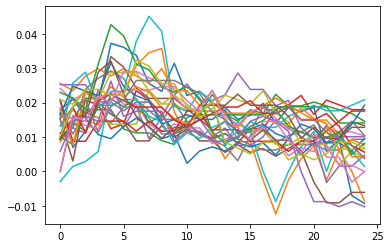

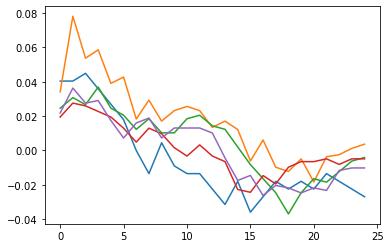

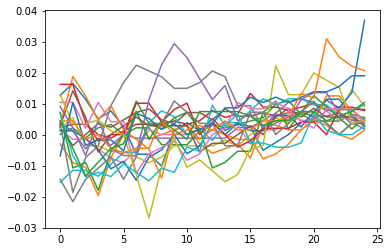

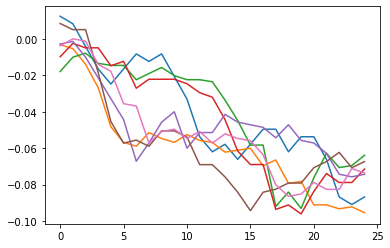

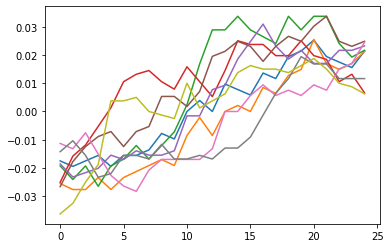

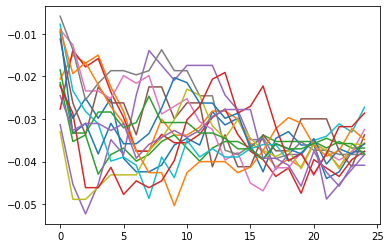

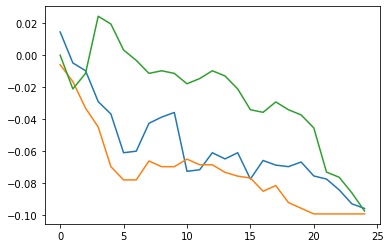

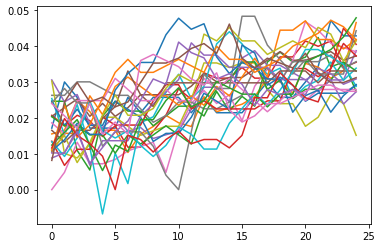

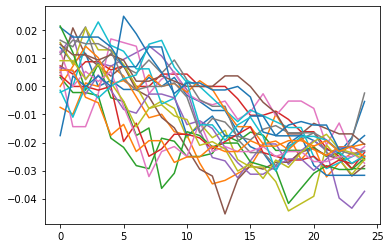

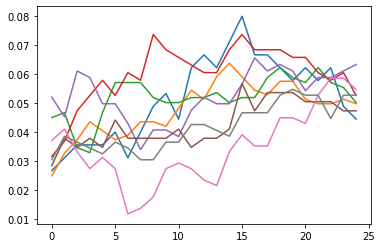

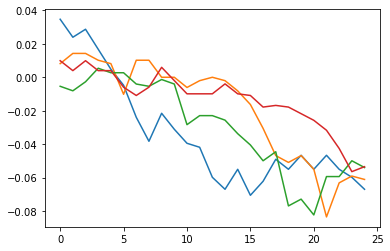

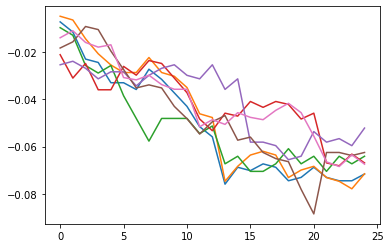

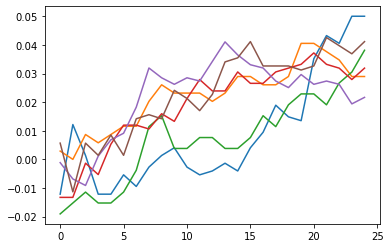

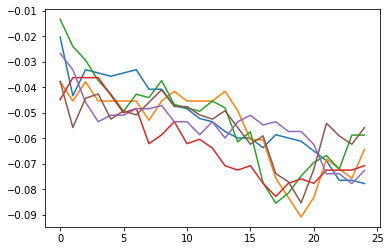

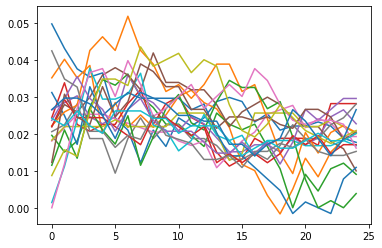

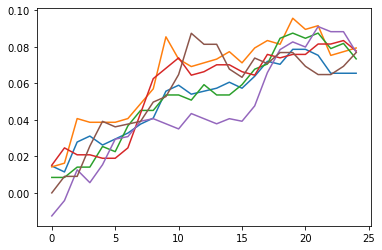

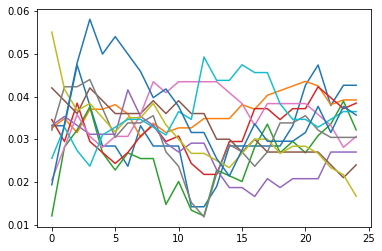

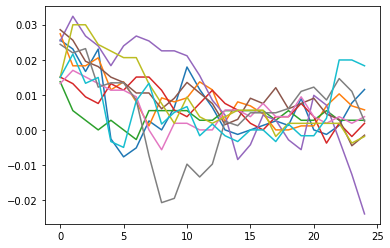

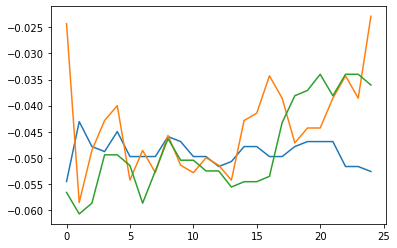

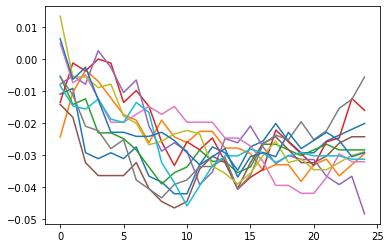

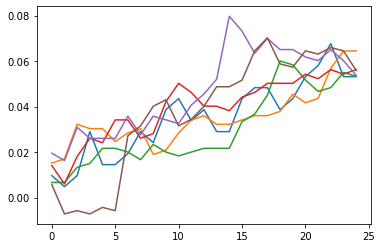

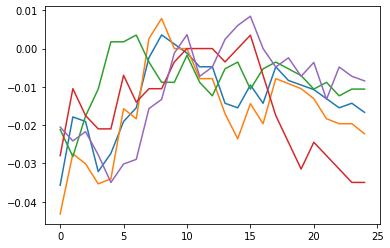

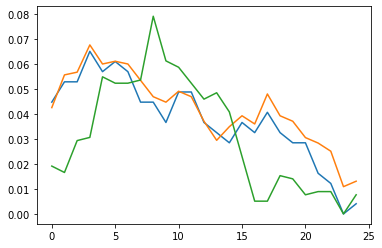

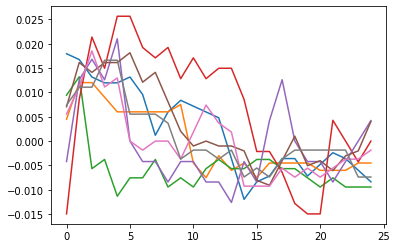

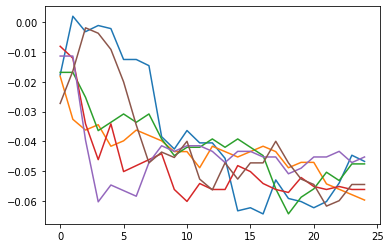

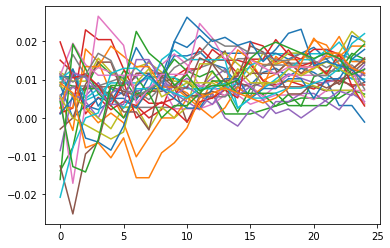

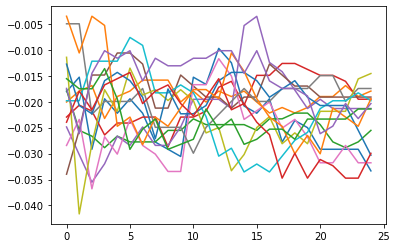

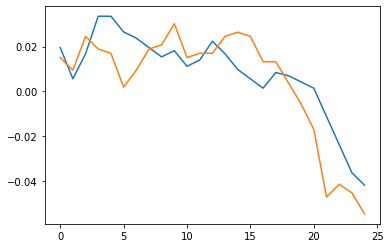

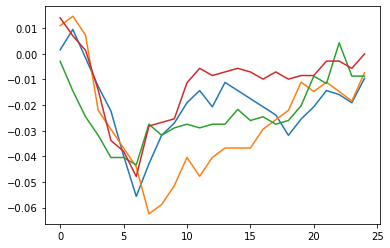

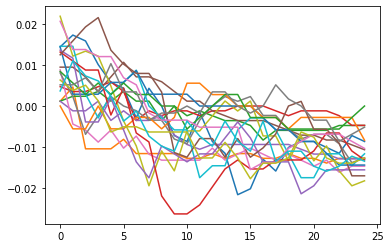

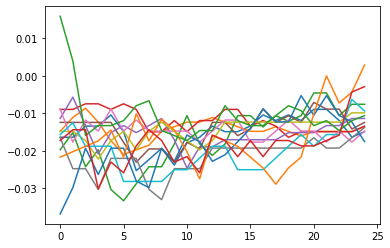

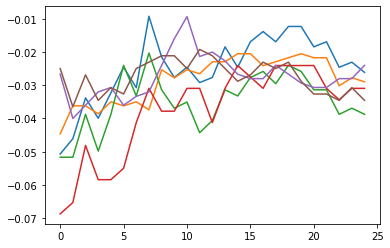

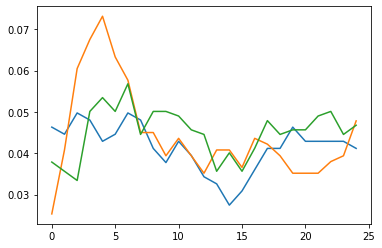

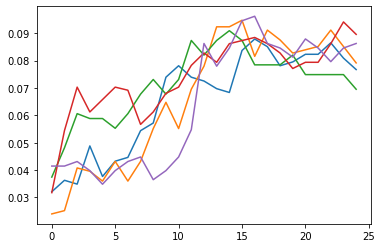

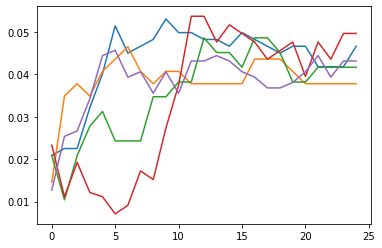

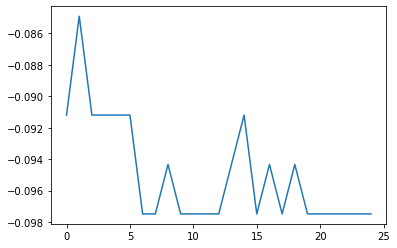

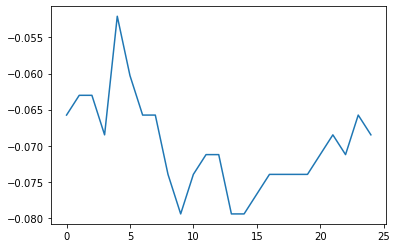

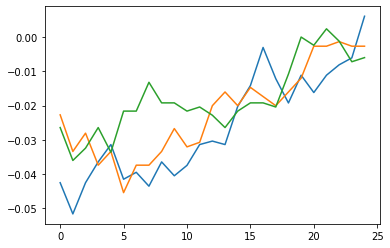

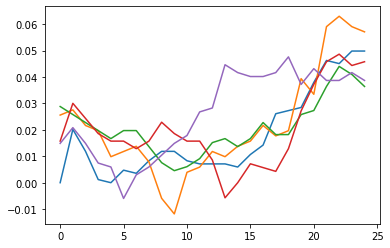

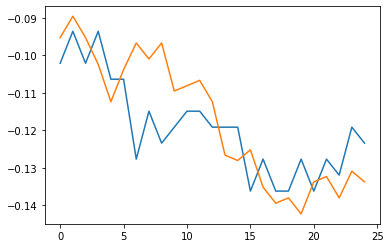

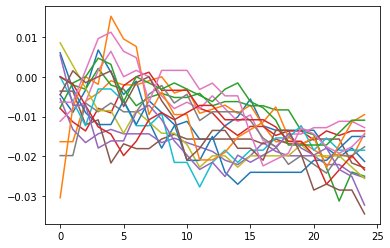

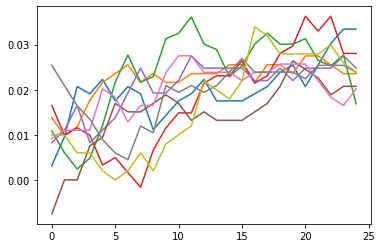

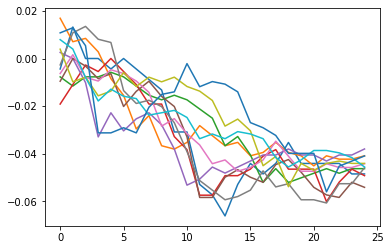

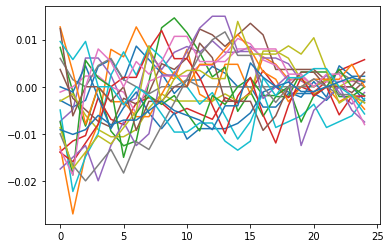

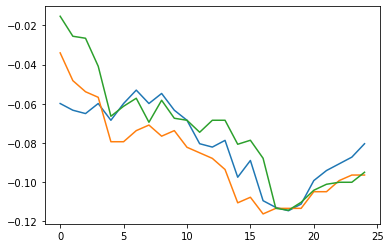

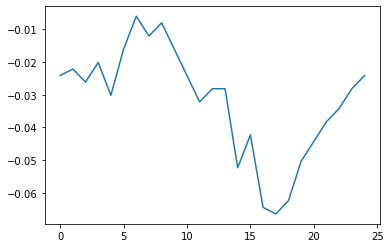

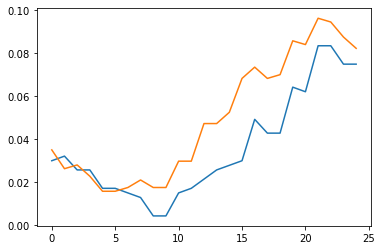

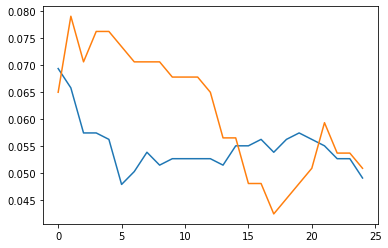

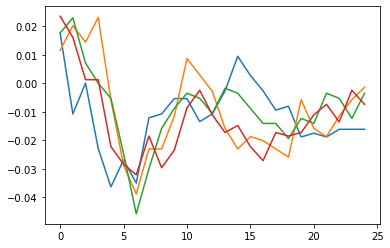

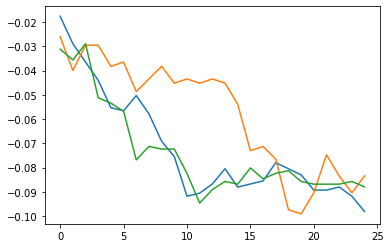

In [14]:
X_label = x_l_p
for n in range(NUM_CLUSTER):
    for i in range(len(X)):
    #     plt.subplot(10, 1, X_label[i]+1)
        if X_label[i] == n:
            plt.plot(X[i])
    plt.show()

In [ ]:
profit_long_array = np.zeros(NUM_CLUSTER)
profit_short_array = np.zeros(NUM_CLUSTER)
lost_long_array = np.zeros(NUM_CLUSTER)
lost_short_array = np.zeros(NUM_CLUSTER)
num_long_array = np.zeros(NUM_CLUSTER).astype("int")
num_short_array = np.zeros(NUM_CLUSTER).astype("int")
for i in range(len(X)):
    profit_long_array[X_label[i]] += make_long_simple(Y[i], 0.002)
    profit_short_array[X_label[i]] += make_short_simple(Y[i], 0.002)
    lost_long_array[X_label[i]] += make_long_max_lost(Y[i], 0.002)
    lost_short_array[X_label[i]] += make_short_max_lost(Y[i], 0.002)
    num_long_array[X_label[i]] += 1
    num_short_array[X_label[i]] += 1
print('best avg long return',sorted(profit_long_array/num_long_array)[::-1])
print('best avg short return' ,sorted(profit_short_array/num_short_array)[::-1])
print('worst avg long return', sorted(lost_long_array/num_long_array)[::-1])
print('worst avg short return', sorted(lost_short_array/num_short_array)[::-1])
print(num_long_array)
print(num_short_array)

In [ ]:
profit_long_array = np.zeros(NUM_CLUSTER)
profit_short_array = np.zeros(NUM_CLUSTER)
lost_long_array = np.zeros(NUM_CLUSTER)
lost_short_array = np.zeros(NUM_CLUSTER)
num_long_array = np.zeros(NUM_CLUSTER).astype("int")
num_short_array = np.zeros(NUM_CLUSTER).astype("int")
for i in range(len(X)):
    profit_long_array[X_label[i]] += make_long(Y[i], 0.002, 0.025)
    profit_short_array[X_label[i]] += make_short(Y[i], 0.002, 0.025)
    num_long_array[X_label[i]] += 1
    num_short_array[X_label[i]] += 1
print('avg long return',sorted(profit_long_array/num_long_array)[::-1])
print('avg short return' ,sorted(profit_short_array/num_short_array)[::-1])
print(num_long_array)
print(num_short_array)

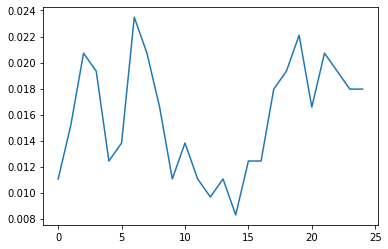

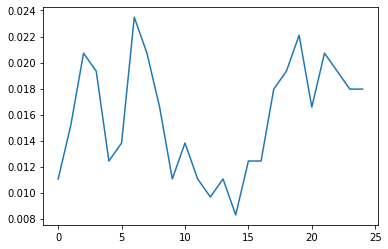

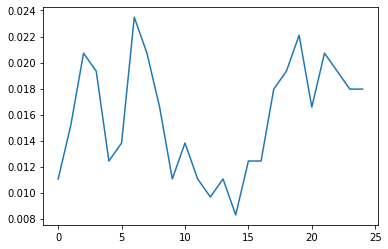

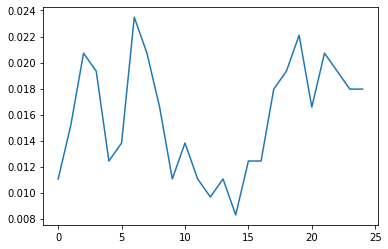

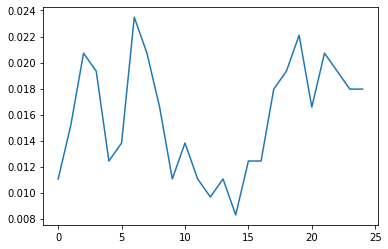

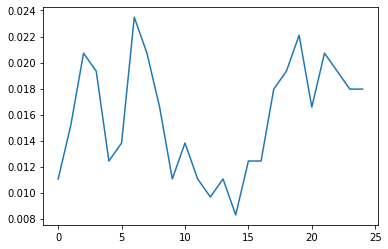

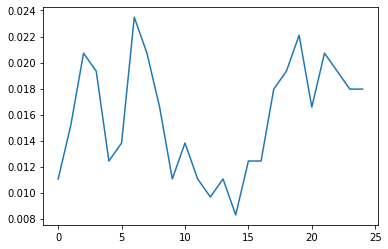

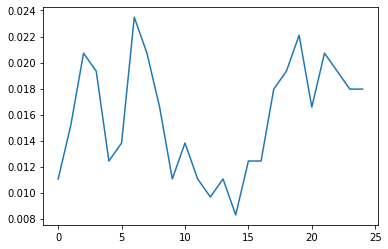

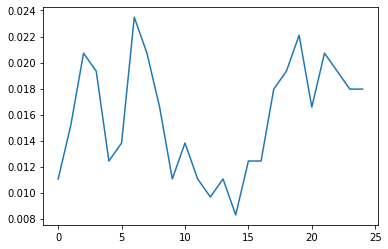

In [26]:
best_long_cluster = np.argsort(profit_long_array/num_long_array)
for n in range(10):
    for i in range(len(X)):
    #     plt.subplot(10, 1, X_label[i]+1)
        if X_label[i] == n:
            plt.plot(X[i])
    plt.show()